In [8]:
#Importing required libraries
import tweepy,warnings
import pandas as pd
import numpy as np
from textblob import TextBlob
from tweepy import Stream
from tweepy.streaming import StreamListener 
from tweepy import OAuthHandler
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.parsing.preprocessing import preprocess_string
import json
import seaborn as sns
import re

In [9]:
#Access tokens
consumer_key = "Gn1r8mXVg4jpBPusrW37664GM"
consumer_secret = "L4rGc5aKsQepup0o2rBsYerWjFgf0vklVYKWf1CJuIbQAHF9W0"
access_token = "270944675-iF5C5ylKXpXKoGjxgvrdSdhrQqeZmOvKA3R18JvD"
access_secret = "EV0pzf9N4hINqhnpQEyM1jeEQu4hP7adhtyQc6zTMcLnS"

In [10]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [72]:
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# The search term you want to find
Query = "Trump"
# Language code (follows ISO 639-1 standards)
#language = "en"
#Geocode for location
#Geo="34.2,-117.4,9mi"   #92407 # Coordinates are accurate 

Geo2="34.13221,-117.296,12mi"
# Calling the user_timeline function with our parameters
results = api.search(q=query, count = 10000, geocode=geo)

# foreach through all tweets pulled
for tweet in results:
   # printing the text stored inside the tweet object
   print(tweet.user.screen_name,"Tweeted:",tweet.text)

labomski Tweeted: @Reuters Remember Turkey was paying Flynn while he worked for Trump.
labomski Tweeted: @FoxNews @PressSec @POTUS Trump didn’t want to put sanctions on Russia, but was forced to (and still did it late) b… https://t.co/PVUBJywsn7
DougTrump16 Tweeted: @voxdotcom Dear Hillary,

Congratulations on the popular vote.

All the best
President Donald J. Trump
The Election Winner.
VagabondWahine Tweeted: $12 million for Trump's military parade? Invoke Article 25 &amp; begin repaying $3 trillion the government 'borrowed" f… https://t.co/sUcZu2bffq
wetpuppy12 Tweeted: So glad to see this AH Is retiring. 🐀🤮 https://t.co/FhEHbQznsV
01Birdlady1 Tweeted: RT @Cortez3Anna: @realDonaldTrump No, it’s called Trump the TRAITOR!
VagabondWahine Tweeted: Our president is totally deranged. If Kelly &amp; advisors can get GOPers to attack Trump for Helsinki, they are equall… https://t.co/5xasV2DGaC
CrashSheridan Tweeted: Pay attention: Sean Hannity always, always effusively praises law enforceme

In [39]:
def to_Sentiment(sent):
    SENTIMENT = ''
    if (sent<=1 and sent>=0.5):
        SENTIMENT='V.Positive'
    elif (sent<0.5 and sent>0):
        SENTIMENT='Positive'
    elif (sent==0):
        SENTIMENT='Neutral'
    elif (sent<0 and sent>=-0.5):
        SENTIMENT='Negative'
    else:
        SENTIMENT='V.Negative'
    
    return SENTIMENT
    

In [53]:
def query_to_DF(query,geo):
    results = api.search(q=query, count = 10000, geocode=geo)
    data = pd.DataFrame(data=[tweet.text for tweet in results], columns=['Tweets'])
    data['Name'] = pd.DataFrame(data=[tweet.user.screen_name for tweet in results], columns=['Names'])
    data_1 = data['Tweets'].tolist()
    sentList = overall_sentiment(data_1)
    Sentiment = pd.DataFrame({'Sentiment Value': sentList})
    data = pd.concat([data, Sentiment], axis=1)
    data_2 = data['Sentiment Value'].tolist()
    newSentList = []
    for i in data_2:
        newSentList.append(to_Sentiment(i))
    WordSentiment = pd.DataFrame({'Sentiment': newSentList})
    data = pd.concat([data, WordSentiment], axis=1)
    
    
    #data['Sentiment'] = data.apply(lambda row: to_Sentiment(row['Sentiment Value']), axis=1)
    
    return data

In [87]:
#exports a list of words to CSV
def export_to_csv(listOfWords,geo, nameOfFile):
    file = nameOfFile+'.xlsx'
    writer = pd.ExcelWriter(file, engine='xlsxwriter')
    for word in listOfWords:
        tempDF = query_to_DF(word,geo)
        tempDF.to_excel(writer, sheet_name=word)
    writer.save()
    return writer

In [88]:
testList= ['California', 'Kobe Bryant']

In [86]:
searchList = ['Democratic Party','Republican Party','San Bernardino','Crime','Housing','Homelessness',
              'Poverty','Transportation','Infrastructure','Immigration','NIMBY','Gun Policy','Health Care','The Economy'
              ,'how things work in Washington','Donald Trump Record','The Environment','Tax Reform'
              ,'Social Issues','Foreign Policy','Infrastructure','marijuana']

In [89]:
export_to_csv(testList, Geo2, 'expTest')

Let’s go when you pick me up from Chicago airport ? Rolando Aguilera https://t.co/1O5b1twSkU
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, Lookin’ good Chicago. Good to be back for a few days. https://t.co/Bga0TF9FJM
neg: 0.0, neu: 0.608, pos: 0.392, compound: 0.7003, @NiallOfficial YESS CANT WAIT TO SEE YOU IN CHICAGO!!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, @onre1218 @Trevor_Lane Live on the west coast, it is what’s all around me. I just tweeted about Jabari this week an… https://t.co/uD5daPBRIY
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, @onre1218 @Trevor_Lane Chicago Bulls! Leggo..... just picked up Jabari Parker.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, Wagoner on Radio: Remembering ‘The Night Chicago Died’ over and over again https://t.co/8tP6WipP1D
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, Wagoner on Radio: Remembering ‘The Night Chicago Died’ over and over again https://t.co/jYXTGGU2o3
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, “Poppy Field”
- Claude Monet - @ Th

neg: 0.128, neu: 0.872, pos: 0.0, compound: -0.3612, @jaubert_moniker zuck is definitely not a nazi but to paraphrase michael jordan, “nazis buy dumb shit off facebook too”
neg: 0.357, neu: 0.573, pos: 0.071, compound: -0.8591, @King_Sreese_ @DatHurdler_Theo Type in "Michael Jordan crying" lol bless up 🙏🏾
neg: 0.186, neu: 0.479, pos: 0.335, compound: 0.3612, You know what’s even crazier? Kobe Bryant used to look at Michael Jordan the same way, history repeats itself. https://t.co/K9IUrJprMc
neg: 0.055, neu: 0.945, pos: 0.0, compound: -0.0258, Please do! Can't stand how the diaz think they're the shit. They are C level figured and these ridiculous fans act… https://t.co/5yYlld0GBK
neg: 0.092, neu: 0.664, pos: 0.243, compound: 0.6239, The Game, Trey Songz, Chadwick Boseman, Michael B Jordan, Omari Hardwick, Maquette King, Devante Swing and Bobby Br… https://t.co/imwjkLOxlQ
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, RT @xRubins: Era casi la hora michael jordan cuando sucedieron los hech

In [48]:
#For Sentiment Analysis
def overall_sentiment(data):
    import nltk
    from nltk.sentiment.vader import SentimentIntensityAnalyzer 
    sid = SentimentIntensityAnalyzer()
    neg=0
    pos=0
    neu=0
    comp=0
    Sentiment = []
    for sentence in data:
        print(sentence)
        ss = sid.polarity_scores(sentence)#calculates the sentiment scores
        for k in ss:
            print('{0}: {1}, '.format(k, ss[k]), end='')#prints the scores for each sentence
            #calculating the overall scores
        neg+=ss['neg']
        pos+=ss['pos']
        neu+=ss['neu']
        comp+=ss['compound']
        Sentiment.append(ss['compound'])
    count=len(data)
    
    return Sentiment

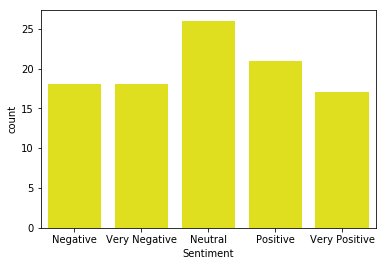

In [90]:
sns.countplot( results_data["Sentiment"], color = 'yellow')

### Percentage of each Sentiment

In [91]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [92]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,Name,SA
0,@Handserifed @retrosher @maddow @McFaul And no...,mca05,0
1,"@RandyRainbow ""You're a foul one Mr. Trump, y...",CarylAnne1963,-1
2,Maybe it’s not a pee tape. Maybe Trump was hav...,Postalman,0
3,@USARanger63 @TD1TribeKU @realDonaldTrump But ...,lostinabss,1
4,@realDonaldTrump And the biggest enemy of the ...,lostinabss,-1
5,@poetofscience @laureldavilacpa @DPOC @kdeleon...,KareemGongora,1
6,@AndrewEvans01 @stevemiller999 @CA_Dem @fontan...,KareemGongora,0
7,"Even President Trump gets run down, tired etc ...",tmac1222,-1
8,RT @sbsun: Opinion: Trump blows hot air in Hel...,PhilDeCarolis,1
9,@maddow what military agreement did Trump ente...,CarylAnne1963,-1


In [93]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]


In [94]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 33.0%
Percentage of neutral tweets: 38.0%
Percentage de negative tweets: 29.0%


In [96]:
##Append two more columns denoting list of topic words and their respective probabilities
def preprocess_and_runLDA(data):
    preprocsplit = (lambda rev: np.asarray(preprocess_string(rev)))
    text_rev = data['Tweets'].apply(preprocsplit).values
    c_dict = Dictionary(text_rev)
    c_corpus = [c_dict.doc2bow(text) for text in text_rev]
    lda = LdaModel(c_corpus)
    topics = [lda.get_document_topics(doc)[0] for doc in c_corpus]
    topIDs,probIDs = list(zip(*topics))
    tops_and_probs = [lda.show_topic(topID) for topID in topIDs]
    tops_and_probs = [list(zip(*t_and_p)) for t_and_p in tops_and_probs]
    tops,probs = [list(top[0]) for top in tops_and_probs],[list(prob[1]) for prob in tops_and_probs]
    words = list(map(lambda word_list: list(map(lambda word: dict(c_dict)[int(word)], word_list)), tops))
    data['top_words'] = pd.Series(words)
    data['top_probs'] = pd.Series(probs)
    return data
    
LDAdata = preprocess_and_runLDA(data)


0     [trump, http, know, davidhogg, mdmbqrqhm, spea...
1     [trump, http, putin, want, didn’t, summit, mhd...
2     [trump, http, mayb, gui, putin, shame, eart…, ...
3     [trump, http, she’, like, appear, get, don’t, ...
4     [fake, weasel, biggest, donald, enemi, america...
5     [trump, http, help, nomine, iqqynnj, vital, po...
6     [http, trump, mayor, despit, win, hasn’t, nomi...
7     [trump, report, tire, run, plate, get, meabuqh...
8     [http, trump, putin, hope, consp…, szhumcfghi,...
9     [russia, maddow, agreement, enter, meet, milit...
10    [http, opinion, trump, helsinki, blow, cartoon...
11    [realdonaldtrump, http, democrat, judgejeanin,...
12    [http, trump, putin, ago, vwapwjiu, ask, prote...
13    [russia, stormi, trump, correct, narscist, que...
14    [trump, http, know, davidhogg, mdmbqrqhm, spea...
15    [http, trump, que, acepta, la, interfirió, pre...
16    [support, oliv, garden, trump, busi, youtub, f...
17    [http, trump, putin, journalist, pfzzwquz,

In [97]:
LDAdata.to_csv('twitter_data_with_LDA.csv')

In [ ]:
def export_to_CSV(df,listOfWords):
    
    
    